# Session 18
(6/07/2021)
## Gradient Descent Visualization 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [61]:
X, y, coeff = make_regression(n_samples=200, n_features=1, random_state=0, coef=True)
y = y.reshape(-1, 1)

In [62]:
class LinearRegression:

    def __get_gradient(self, X, y):
        gradient = []
        for  i in range(X.shape[1]):
            grad = -2*( ( (y - self.predict(X))* (X[:,i].reshape(-1,1)) ).sum() ) 
            gradient.append(grad)
        return np.array(gradient).reshape(-1,1)

    def __gradient_descent(self, X, y, learning_rate, epochs, batch_size):

        # start with any random weights
        self.w = np.random.randn(X.shape[1]).reshape(-1,1)
        # self.w = np.zeros((X.shape[1], 1)) 

        idx = np.arange(0,X.shape[0])

        losses = []
        parameters = np.zeros((epochs, 2))

        for i in range(epochs):
            random_idx = np.random.choice(idx, size = batch_size)

            # update rule
            self.w = self.w - learning_rate*self.__get_gradient(X[random_idx], y[random_idx])

            ypred = self.predict(X)
            loss = self.loss(y, ypred)
            r2_score = self.r_squared(y, ypred)
            losses.append(loss)
            print("\r" + f"epoch: {i}, loss: {loss}, r2: {r2_score}", end="") 
            parameters[i] = self.w[0][0], self.w[1][0]

        return losses, parameters


    def fit(self, X, y, method="batch", learning_rate=0.001, epochs=300, **kwargs):
        """ Training the model"""
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)

        if method == "batch":
            batch_size = X.shape[0] # all the samples

        elif method == "mini-batch":
            if kwargs.get('batch_size') == None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']

        elif method == 'stochastic':
            batch_size = 1

        return self.__gradient_descent(X, y, learning_rate, epochs, batch_size)
        
        

    def predict(self, X):
        return X.dot(self.w)

    def loss(self, y, ypred):
        return ((y - ypred)**2).sum()

    def r_squared(self, ytrue, ypred):
        e_method = ((ytrue-ypred)**2).sum() # sum of squares of residuals
        e_baseline = ((ytrue-ytrue.mean())**2).sum() # total sum of squares
        return 1 - e_method/e_baseline

## Mini-Batch Gradient Descent

In [63]:
lr = LinearRegression()

In [64]:
loss, parameter = lr.fit(X, y, method = 'mini-batch', learning_rate = 0.01, epochs = 5)

epoch: 4, loss: 0.00024273680829479247, r2: 0.9999999998742807

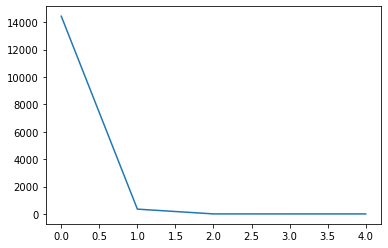

In [65]:
plt.plot(loss)
plt.show()

## Batch Gradient Descent

In [51]:
loss2, parameter2 = lr.fit(X, y, method = 'batch', learning_rate = 0.001, epochs = 10)

epoch: 9, loss: 76.30540907953198, r2: 0.9999505365197633

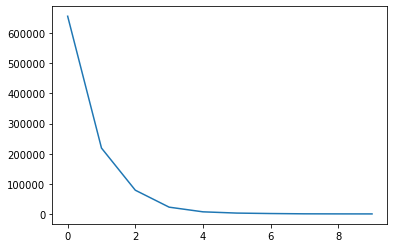

In [52]:
plt.plot(loss2)
plt.show()

## Stochastic Gradient Descent

In [45]:
loss3, parameter3 = lr.fit(X, y, method = 'stochastic', learning_rate = 0.01, epochs = 300)

epoch: 299, loss: 4.841053127042325, r2: 0.9999968618825511

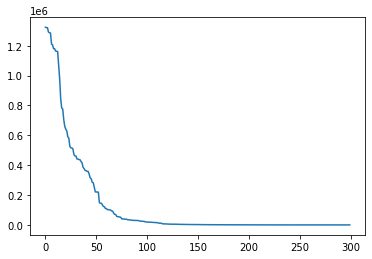

In [46]:
plt.plot(loss3)
plt.show()

# Plotting Loss for Univariate LR

In [93]:
def squared_loss(X, y, m, c):
    # Prediction
    ypred = m*X.T + c

    y = y.reshape(1, -1)
    
    # Loss Computation
    return ((y-ypred)**2).sum(axis = 1)

def plot_loss(X, y, losses, parameters, func = squared_loss):
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection = "3d")
    
    M = np.linspace(0, 100, 50)
    C = np.linspace(-10, 100, 50)
    
    M, C = np.meshgrid(M, C)
    L = squared_loss(X, y, M.reshape(-1, 1), C.reshape(-1, 1))
    print(L.shape)
    L = L.reshape(M.shape) # We require 2D matrix
    
    ax.plot_surface(M, C, L, cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(parameters[:,1], parameters[:,0], losses, c = 'red', s=30)
    
    ax.set_xlabel('M')
    ax.set_ylabel('C/Bias')
    ax.set_zlabel('L')
    
    plt.show()

epoch: 49, loss: 38.420083726989844, r2: 0.9999801013073638(2500,)


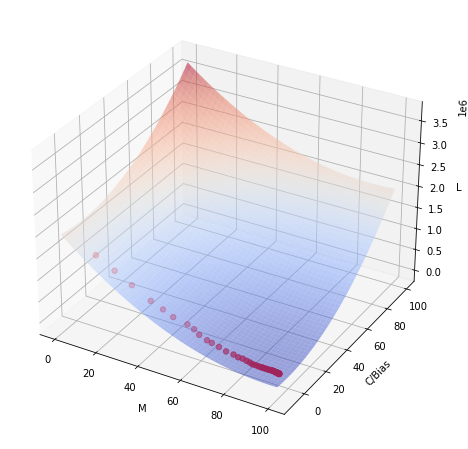

In [104]:
lr = LinearRegression()
loss, parameter = lr.fit(X, y, method = 'mini-batch', learning_rate = 0.001, epochs = 50)

plot_loss(X, y, loss, parameter)

In [105]:
parameter.min(axis=0), parameter.max(axis=0)

(array([-1.94797383, 11.78636599]), array([ 2.46298103, 95.80481848]))